# Predicting Credit Card Spend and Identifying Key Drivers

In [1]:
# linear algebra
import numpy as np

# data processing 
import pandas as pd

# data visualization 
import seaborn as sn
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# parameters 
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('F:\\Akash\\New folder\\Credit card detection\\Project 1\\Data Set.xlsx')

## DATA AUDIT

In [3]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
data.tail()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,...,1,0,0,0,0,0,1,0,0,0
4996,4699-LEPCCE-3UD,3,3.0,0,51,5,May,14,2,1,...,1,0,0,0,0,0,0,0,0,0
4997,8485-LLUICH-CVV,4,5.0,0,75,6,August,17,4,1,...,1,1,0,0,0,0,1,0,0,0
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,...,1,0,1,1,1,0,1,0,0,0
4999,8027-EXDZBF-OGR,3,5.0,1,41,4,May,10,1,5,...,1,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(5000, 130)

In [6]:
data.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
data.isnull().sum() 

custid         0
region         0
townsize       2
gender         0
age            0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 130, dtype: int64

In [8]:
## Since the objective of this case study what's driving total spend (primary card + secondary card)
data['total_spend']=data.cardspent + data.card2spent

In [9]:
# Dropping variables based on high number of missing values
data.drop(columns=['lnwireten','lnwiremon','lntollten','lntollmon','lnequipten','lnequipmon'])


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,...,0,0,0,0,0,1,0,0,0,1425.67
4996,4699-LEPCCE-3UD,3,3.0,0,51,5,May,14,2,1,...,0,0,0,0,0,0,0,0,0,366.35
4997,8485-LLUICH-CVV,4,5.0,0,75,6,August,17,4,1,...,1,0,0,0,0,1,0,0,0,1527.75
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,...,0,1,1,1,0,1,0,0,0,752.95


In [10]:
data = data.drop(columns = ['cardspent', 'card2spent', 'custid'])

In [11]:
for x in ['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
        data[x]=data[x].astype('object')


In [12]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [13]:
conti_data=data.loc[:, ((data.dtypes=='int64')| (data.dtypes=='float64'))]

cat_data=data.loc[:, (data.dtypes=='object')]

In [14]:
cat_data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


In [15]:
conti_data.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [16]:
# Create Data audit Report for continuous variables
def continous_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.std(),x.var(),x.mean(),x.median(),x.min(),
                       x.quantile(0.01),x.quantile(0.1),x.quantile(0.25),
                        x.quantile(0.5),x.quantile(0.75),x.quantile(0.90),x.quantile(0.99),x.max()],
                       index=['COUNT','NULL','SUM','STD DIV','VARIANCE','MEAN','MEDIAN','MIN','P1','P10','P25','P50','P75','P90','P99','MAX'])

In [17]:
conti_data.apply(continous_var_summary).T.round(2)

,COUNT,NULL,SUM,STD DIV,VARIANCE,MEAN,MEDIAN,MIN,P1,P10,P25,P50,P75,P90,P99,MAX
age,5000.0,0.0,235128.00,17.77,315.78,47.03,47.00,18.00,18.00,23.00,31.00,47.00,62.00,72.00,79.00,79.00
ed,5000.0,0.0,72715.00,3.28,10.77,14.54,14.00,6.00,8.00,10.00,12.00,14.00,17.00,19.00,21.00,23.00
income,5000.0,0.0,273798.00,55.38,3066.67,54.76,38.00,9.00,9.00,16.00,24.00,38.00,67.00,109.10,272.01,1073.00
lninc,5000.0,0.0,18499.55,0.75,0.56,3.70,3.64,2.20,2.20,2.77,3.18,3.64,4.20,4.69,5.61,6.98
debtinc,5000.0,0.0,49770.80,6.40,40.96,9.95,8.80,0.00,0.70,2.80,5.10,8.80,13.60,18.60,29.20,43.10
creddebt,5000.0,0.0,9286.63,3.42,11.67,1.86,0.93,0.00,0.03,0.18,0.39,0.93,2.06,4.30,14.28,109.07
lncreddebt,4999.0,1.0,-652.14,1.27,1.62,-0.13,-0.08,-6.60,-3.40,-1.74,-0.95,-0.08,0.72,1.46,2.66,4.69
othdebt,5000.0,0.0,18272.30,5.40,29.11,3.65,2.10,0.00,0.11,0.46,0.98,2.10,4.31,8.06,24.06,141.46
lnothdebt,4999.0,1.0,3483.88,1.13,1.27,0.70,0.74,-4.09,-2.17,-0.78,-0.02,0.74,1.46,2.09,3.18,4.95
spoused,5000.0,0.0,30564.00,7.74,59.96,6.11,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,14.00,16.00,20.00,24.00


In [18]:
#  Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False).reset_index().head(1)
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [19]:
cat_data.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
region,5000.0,0.0,5.0,1027.0,20.54
townsize,4998.0,2.0,1.0,1436.0,28.73
gender,5000.0,0.0,1.0,2518.0,50.36
agecat,5000.0,0.0,4.0,1222.0,24.44
birthmonth,5000,0,September,458,9.16
...,...,...,...,...,...
ownfax,5000.0,0.0,0.0,4106.0,82.12
news,5000.0,0.0,0.0,2637.0,52.74
response_01,5000.0,0.0,0.0,4582.0,91.64
response_02,5000.0,0.0,0.0,4351.0,87.02


In [20]:
## Outlier Treatment
#conti_data=conti_data.apply(lambda x: x.clip(lower=x.dropna().quantile(0.01),upper=x.quantile(0.99)))

In [21]:
def missing_imputation(x, stats = 'mean'):
    if ((x.dtype == 'float64') | (x.dtype == 'int64')):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x.fillna(x.mode())
    return x

In [22]:
conti_data=conti_data.apply(missing_imputation)
cat_data=cat_data.apply(missing_imputation)

In [23]:
conti_data.apply(continous_var_summary).T.round(2)

,COUNT,NULL,SUM,STD DIV,VARIANCE,MEAN,MEDIAN,MIN,P1,P10,P25,P50,P75,P90,P99,MAX
age,5000.0,0.0,235128.00,17.77,315.78,47.03,47.00,18.00,18.00,23.00,31.00,47.00,62.00,72.00,79.00,79.00
ed,5000.0,0.0,72715.00,3.28,10.77,14.54,14.00,6.00,8.00,10.00,12.00,14.00,17.00,19.00,21.00,23.00
income,5000.0,0.0,273798.00,55.38,3066.67,54.76,38.00,9.00,9.00,16.00,24.00,38.00,67.00,109.10,272.01,1073.00
lninc,5000.0,0.0,18499.55,0.75,0.56,3.70,3.64,2.20,2.20,2.77,3.18,3.64,4.20,4.69,5.61,6.98
debtinc,5000.0,0.0,49770.80,6.40,40.96,9.95,8.80,0.00,0.70,2.80,5.10,8.80,13.60,18.60,29.20,43.10
creddebt,5000.0,0.0,9286.63,3.42,11.67,1.86,0.93,0.00,0.03,0.18,0.39,0.93,2.06,4.30,14.28,109.07
lncreddebt,5000.0,0.0,-652.27,1.27,1.62,-0.13,-0.08,-6.60,-3.40,-1.74,-0.95,-0.08,0.72,1.46,2.66,4.69
othdebt,5000.0,0.0,18272.30,5.40,29.11,3.65,2.10,0.00,0.11,0.46,0.98,2.10,4.31,8.06,24.06,141.46
lnothdebt,5000.0,0.0,3484.58,1.13,1.27,0.70,0.74,-4.09,-2.17,-0.78,-0.02,0.74,1.46,2.09,3.18,4.95
spoused,5000.0,0.0,30564.00,7.74,59.96,6.11,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,14.00,16.00,20.00,24.00


In [24]:
## Create Dummies
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [25]:
for c_feature in cat_data:
    cat_data[c_feature]=cat_data[c_feature].astype('category')
    cat_data=create_dummies(cat_data,c_feature)

In [26]:
cat_data.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0


In [27]:
conti_data=conti_data.apply(missing_imputation)
cat_data=cat_data.apply(missing_imputation)

In [28]:
cat_data.isna().sum().sum()

0

In [29]:
conti_data.isna().sum().sum()

0

In [30]:
data_final=pd.concat([conti_data,cat_data],axis=1)
data_final.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [31]:
for x in data_final:
    data_final[x]=data_final[x].astype(int)

In [32]:
data_final.dtypes.unique()

array([dtype('int32')], dtype=object)

# Assumptions

## 1. Y should be normal

<AxesSubplot:xlabel='total_spend', ylabel='Density'>

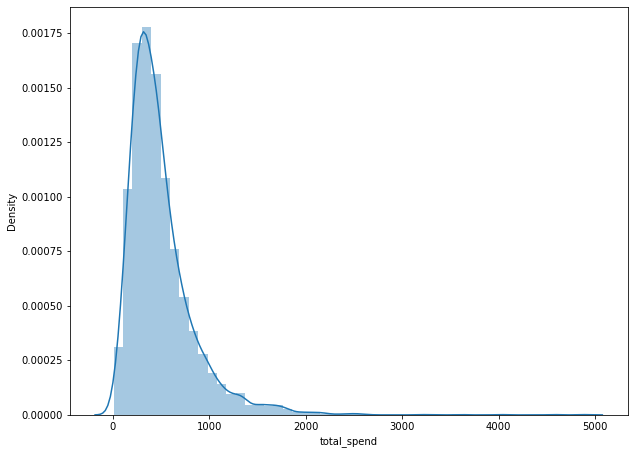

In [33]:
## To check the normality, we have to plot the dsitance plot which will give histogram
sn.distplot(data_final.total_spend)

In [34]:
## We can see that Y is not normal,In order to make it normal we will take log.

data_final['ln_total_spend']=np.log10(data_final['total_spend'])

<AxesSubplot:xlabel='ln_total_spend', ylabel='Density'>

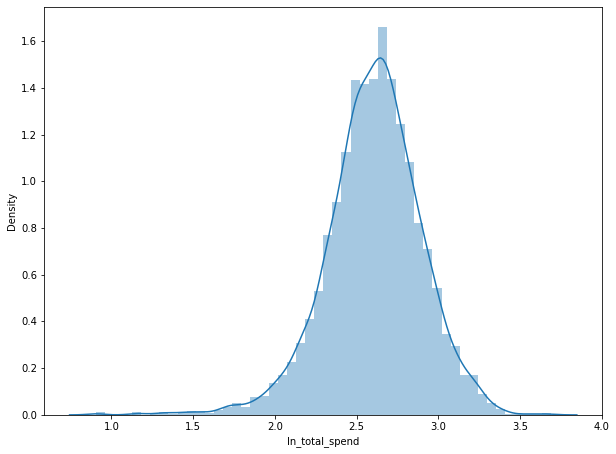

In [35]:
sn.distplot(data_final['ln_total_spend'])

In [36]:
## Now, y is normal.

## 2. Y should not have any missing values

In [37]:
data_final.total_spend.isna().sum()


0

## 3.There must be a relationship between X and Y

In [38]:
corr_matrix=data_final.corr()

In [39]:
## To find co-relation between X and Y variables
corr_columns=corr_matrix.loc[(corr_matrix.ln_total_spend<0.01) & (corr_matrix.ln_total_spend>-0.01)].T.columns
corr_columns

Index(['age', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'commutetime', 'region_2',
       ...
       'card2tenure_18', 'card2tenure_21', 'card2tenure_22', 'card2tenure_24',
       'card2tenure_27', 'card2tenure_29', 'card2tenure_30',
       'card2tenurecat_3', 'active_1', 'internet_2'],
      dtype='object', length=146)

In [40]:
## Dropping X variables based on low-correlation with Y var
data_final=data_final.drop(columns = corr_columns)

In [41]:
corr_matrix_final=data_final.corr()
corr_matrix_final

,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,pets_birds,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
ed,1.000000,0.178036,0.196379,0.011707,0.103327,0.119321,0.126660,0.141108,0.117563,0.008051,...,0.299871,0.435034,0.369256,0.376235,0.276750,-0.073644,-0.117606,0.073207,0.107171,0.097471
income,0.178036,1.000000,0.775548,0.017972,0.663121,0.473916,0.732106,0.568973,0.038089,-0.002780,...,0.139004,0.048604,0.037423,0.031165,0.145425,0.121696,-0.007106,0.053693,0.047225,0.327850
lninc,0.196379,0.775548,1.000000,0.016651,0.441931,0.488435,0.534184,0.591058,0.046128,0.010880,...,0.142765,0.061400,0.059431,0.056130,0.137567,0.104358,-0.005363,0.053048,0.060391,0.383800
debtinc,0.011707,0.017972,0.016651,1.000000,0.355437,0.495839,0.450768,0.575600,-0.038570,-0.012528,...,0.001908,0.010001,0.014406,0.009038,0.003458,0.004070,0.004551,0.002407,0.019810,0.017070
creddebt,0.103327,0.663121,0.441931,0.355437,1.000000,0.581261,0.663747,0.461100,0.011072,-0.012274,...,0.056343,0.021195,0.012246,-0.005413,0.070882,0.073851,-0.000578,0.027808,0.025602,0.198680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news_1,-0.073644,0.121696,0.104358,0.004070,0.073851,0.040467,0.089365,0.081898,0.090618,-0.024218,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.027441
response_01_1,-0.117606,-0.007106,-0.005363,0.004551,-0.000578,-0.010634,0.000239,-0.000842,-0.008600,-0.017761,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.010284
response_02_1,0.073207,0.053693,0.053048,0.002407,0.027808,0.029872,0.034980,0.046207,0.032034,-0.003191,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.024825
response_03_1,0.107171,0.047225,0.060391,0.019810,0.025602,0.048556,0.039134,0.044559,0.002480,0.008489,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.061550


In [42]:
st=corr_matrix_final.unstack().sort_values().drop_duplicates().reset_index()
st2=st.loc[(st[0]>0.5) | (st[0]<-0.5)]
st2=st2['level_0'].unique()
st2

array(['cartype_0', 'carown_0', 'hometype_2', 'carcatvalue_1',
       'carcatvalue_2', 'reason_9', 'tenure', 'bfast_3', 'income',
       'hourstv', 'lnlongten', 'pager_1', 'cardtenurecat_2', 'edcat_5',
       'equipmon', 'ownpda_1', 'wireten', 'lnlongmon', 'addresscat_2',
       'wiremon', 'tollten', 'wireless_1', 'lnwiremon', 'longmon',
       'inccat_5', 'othdebt', 'lninc', 'carvalue', 'ed', 'lntollmon',
       'lnwireten', 'equip_1', 'cardtenurecat_5', 'longten', 'lncardten',
       'lnequipten', 'lnothdebt', 'carcatvalue_3', 'lncreddebt',
       'forward_1', 'ownfax_1', 'tollmon', 'voice_1', 'cardten',
       'callwait_1', 'news_1', 'confer_1', 'tollfree_1', 'lntollten',
       'equipten', 'callcard_1', 'card2tenurecat_5', 'retire_1',
       'creddebt', 'lncardmon', 'card2tenure_1', 'commute_4', 'cardmon',
       'total_spend', 'spoused', 'response_03_1'], dtype=object)

In [43]:
data_final=data_final.drop(columns=['cartype_0', 'carown_0', 'hometype_2', 'carcatvalue_1',
       'carcatvalue_2', 'reason_9', 'tenure', 'bfast_3', 'income',
       'hourstv', 'lnlongten', 'pager_1', 'cardtenurecat_2', 'edcat_5',
       'equipmon', 'ownpda_1', 'wireten', 'lnlongmon', 'addresscat_2',
       'wiremon', 'tollten', 'wireless_1', 'lnwiremon', 'longmon',
       'inccat_5', 'othdebt', 'lninc', 'carvalue', 'ed', 'lntollmon',
       'lnwireten', 'equip_1', 'cardtenurecat_5', 'longten', 'lncardten',
       'lnequipten', 'lnothdebt', 'carcatvalue_3', 'lncreddebt',
       'forward_1', 'ownfax_1', 'tollmon', 'voice_1', 'cardten',
       'callwait_1', 'news_1', 'confer_1', 'tollfree_1', 'lntollten',
       'equipten', 'callcard_1', 'card2tenurecat_5', 'retire_1',
       'creddebt', 'lncardmon', 'card2tenure_1', 'commute_4', 'cardmon',
       'total_spend', 'spoused', 'response_03_1'])


In [44]:
data_final.shape

(5000, 194)

<Figure size 3600x2880 with 0 Axes>

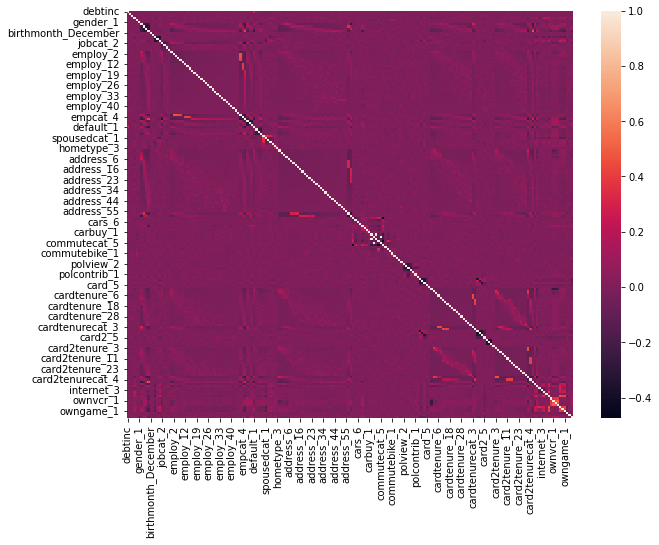

<Figure size 3600x2880 with 0 Axes>

In [45]:
## Plotting heat map
sn.heatmap(data_final.corr())
plt.figure(figsize=(50,40))

# Building a Linear Regression Model

In [46]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(data_final, test_size = 0.30, random_state = 42)

In [47]:
feature_cols=data_final.columns.difference(['ln_total_spend','total_spend'])

In [48]:
form= " ln_total_spend ~ " +  "+".join(feature_cols)

In [49]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=form, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     8.133
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          4.38e-165
Time:                        20:59:17   Log-Likelihood:                -16.661
No. Observations:                3500   AIC:                             415.3
Df Residuals:                    3309   BIC:                             1592.
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7491      0.088     31.299      0.000       2.577       2.921
address_1              -0.0448      0.029     -1.549      0.122      -0.101       0.012
address_10              0.0304      0.028      1.084      0.278      -0.025       0.085
address_11              0.0379      0.028      1.330      0.184      -0.018       0.094
address_14              0.0469      0.027      1.711      0.087      -0.007       0.101
address_15              0.0359      0.029      1.248      0.212      -0.020       0.092
address_16              0.0231      0.031      0.742      0.458      -0.038       0.084
address_17              0.0295      0.033      0.887      0.375      -0.036       0.095
address_18             -0.0004      0.031     -0.012      0.990      -0.060       0.060
address_2              -0.0006      0.025     -0.026      0.980      -0.050       0.049
address_20              0.0040      0.034      0.119      0.905      -0.062       0.070
address_22              0.0399      0.036      1.120      0.263      -0.030       0.110
address_23              0.0185      0.035      0.530      0.596      -0.050       0.087
address_25             -0.0118      0.035     -0.337      0.736      -0.080       0.057
address_27             -0.0409      0.037     -1.114      0.265      -0.113       0.031
address_28              0.0166      0.033      0.505      0.614      -0.048       0.081
address_3              -0.0287      0.026     -1.091      0.276      -0.080       0.023
address_32              0.0805      0.037      2.188      0.029       0.008       0.153
address_34              0.0270      0.045      0.594      0.552      -0.062       0.116
address_36             -0.0265      0.048     -0.551      0.582      -0.121       0.068
address_37             -0.0414      0.048     -0.870      0.385      -0.135       0.052
address_39             -0.0622      0.050     -1.251      0.211      -0.160       0.035
address_4              -0.0239      0.023     -1.019      0.308      -0.070       0.022
address_40              0.0074      0.051      0.145      0.884      -0.092       0.107
address_44             -0.1221      0.061     -2.001      0.045      -0.242      -0.002
address_45             -0.0435      0.072     -0.601      0.548      -0.186       0.099
address_47             -0.0665      0.075     -0.886      0.376      -0.214       0.081
address_50              0.0751      0.186      0.403      0.687      -0.290       0.440
address_53              0.1944      0.148      1.310      0.190      -0.097       0.485
address_55              0.1466      0.129      1.138      0.255      -0.106       0.399
address_6               0.0045      0.027      0.170      0.865      -0.048       0.057
addresscat_3           -0.0134      0.017     -0.805      0.421      -0.046       0.019
add

In [50]:
## Dropping variables based on high P-values
data_final=data_final.drop(columns= ['address_1','address_10','address_11','address_14','address_15','address_16','address_17',
                           'address_18','address_2','address_20','address_22','address_23','address_25','address_27',
                            'address_28','address_3','address_34','address_36','address_37','address_39','address_4',
                             'address_40','address_45','address_47','address_50','address_53','address_55','address_6',
                              'addresscat_3','addresscat_4','agecat_3','agecat_4','agecat_6','birthmonth_December','birthmonth_February',
                              'callid_1','carbought_0','carbuy_1','card2benefit_2','card2benefit_4','card2fee_1','card2tenure_10','card2tenure_11',
                               'card2tenure_13','card2tenure_15','card2tenure_19','card2tenure_23','card2tenure_25','card2tenure_3','card2tenure_4',
                                'card2tenure_7','card2tenure_8','card2tenurecat_2','card2tenurecat_4','cardbenefit_3','cardtenure_1','cardtenure_13',
                                 'cardtenure_14','cardtenure_15','cardtenure_18','cardtenure_19','cardtenure_21','cardtenure_22','cardtenure_23','cardtenure_28',
                                  'cardtenure_29','cardtenure_3','cardtenure_31','cardtenure_34','cardtenure_37','cardtenure_4','cardtenure_6','cardtenure_7',
                                   'cardtenurecat_3','cardtenurecat_4','cars_4','cars_6','cars_7','cartype_1','churn_1','commute_10','commute_3','commutebike_1',
                                    'commutebus_1','commutecar_1','commutecat_2','commutecat_3','commutecat_5','commutemotorcycle_1','commutenonmotor_1',
                                     'commuterail_1','edcat_2','edcat_3','edcat_4','empcat_2','empcat_4','empcat_5','employ_1','employ_12','employ_13',
                                    'employ_14','employ_16','employ_17','employ_19','employ_2','employ_21','employ_23','employ_24','employ_26',
                                    'employ_28','employ_3','employ_30','employ_31','employ_33','employ_34','employ_36','employ_39','employ_4','employ_40',
                                    'employ_5','employ_52','homeown_1','hometype_3','inccat_2','internet_1','jobcat_2','jobcat_3','jobcat_4','jobsat_3',
                                'jobsat_4','jobsat_5','lnequipmon','marital_1','multline_1','owngame_1','ownpc_1','owntv_1','pets_birds','pets_reptiles',
                               'polcontrib_1','polview_2','polview_3','polview_4','polview_6','reason_3','region_5','response_01_1','response_02_1',
                             'spousedcat_1','spousedcat_3','spousedcat_4','spousedcat_5','union_1','vote_1'])

In [51]:
data_final.shape

(5000, 40)

In [52]:
data_final.columns

Index(['debtinc', 'gender_1', 'agecat_5', 'employ_6', 'employ_25', 'employ_32',
       'employ_35', 'employ_43', 'employ_45', 'inccat_3', 'inccat_4',
       'default_1', 'address_32', 'address_44', 'cars_1', 'carown_1',
       'reason_2', 'reason_4', 'polview_7', 'card_2', 'card_3', 'card_4',
       'card_5', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card2benefit_3',
       'card2tenure_20', 'card2tenure_26', 'card2tenure_28', 'bfast_2',
       'internet_3', 'internet_4', 'ebill_1', 'ownvcr_1', 'owndvd_1',
       'owncd_1', 'ownipod_1', 'ln_total_spend'],
      dtype='object')

In [53]:
feature_cols2=data_final.columns.difference(['ln_total_spend','total_spend'])

In [54]:
form2="ln_total_spend ~" + "+".join(feature_cols2)

In [55]:
lm2=smf.ols(formula=form2,data=train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     35.72
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          1.97e-221
Time:                        20:59:18   Log-Likelihood:                -95.212
No. Observations:                3500   AIC:                             270.4
Df Residuals:                    3460   BIC:                             516.8
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7639      0.026    105.075      0.000       2.712       2.816
address_32         0.0881      0.035      2.511      0.012       0.019       0.157
address_44        -0.1042      0.058     -1.782      0.075      -0.219       0.010
agecat_5           0.0370      0.010      3.542      0.000       0.017       0.058
bfast_2           -0.0299      0.010     -3.086      0.002      -0.049      -0.011
card2_2           -0.1896      0.014    -13.702      0.000      -0.217      -0.162
card2_3           -0.1856      0.014    -13.484      0.000      -0.213      -0.159
card2_4           -0.2003      0.015    -13.251      0.000      -0.230      -0.171
card2_5           -0.1433      0.020     -7.209      0.000      -0.182      -0.104
card2benefit_3    -0.0257      0.010     -2.666      0.008      -0.045      -0.007
card2tenure_20     0.0513      0.026      1.946      0.052      -0.000       0.103
card2tenure_26     0.0652      0.029      2.274      0.023       0.009       0.121
card2tenure_28     0.0478      0.026      1.824      0.068      -0.004       0.099
card_2            -0.2788      0.014    -20.523      0.000      -0.305      -0.252
card_3            -0.2777      0.014    -19.967      0.000      -0.305      -0.250
card_4            -0.3072      0.014    -21.678      0.000      -0.335      -0.279
card_5            -0.2344      0.023    -10.298      0.000      -0.279      -0.190
carown_1           0.0500      0.010      4.963      0.000       0.030       0.070
cars_1            -0.0196      0.010     -1.905      0.057      -0.040       0.001
debtinc           -0.0011      0.001     -1.581      0.114      -0.002       0.000
default_1          0.0305      0.011      2.773      0.006       0.009       0.052
ebill_1           -0.0242      0.011     -2.251      0.024      -0.045      -0.003
employ_25          0.0972      0.044      2.206      0.027       0.011       0.184
employ_32          0.1548      0.058      2.672      0.008       0.041       0.268
employ_35          0.1244      0.068      1.841      0.066      -0.008       0.257
employ_43         -0.2427      0.126     -1.930      0.054      -0.489       0.004
employ_45          0.4498      0.178      2.529      0.011       0.101       0.799
employ_6           0.0324      0.019      1.685      0.092      -0.005       0.070
gender_1          -0.0203      0.009     -2.367      0.018      -0.037      -0.003
inccat_3           0.0782      0.012      6.622      0.000       0.055       0.101
inccat_4           0.1276      0.013      9.608      0.000       0.102       0.154
internet_3         0.0380      0.014      2.701      0.007       0.010       0.066
internet_4         0.0440      0.015      2.931      0.003       0.015       0.073
owncd_1            0.0682      0.020      3.375      0.001       0.029       0.108
owndvd_1    

In [56]:
## Dropping variables on high p-values
data_final=data_final.drop(columns= ['address_44','card2tenure_20','card2tenure_28','cars_1','debtinc',
                                      'employ_35','employ_43','employ_6','polview_7'])

In [57]:
data_final.shape

(5000, 31)

In [58]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data_final,test_size=0.3,random_state = 10) 
train_X,test_X,train_y,test_y =train_test_split(data_final.loc[:,data_final.columns.difference(['ln_total_spend'])],data_final['ln_total_spend'])

In [59]:
X_cols= data_final.columns.difference(['ln_total_spend'])

In [60]:
form3="ln_total_spend~" + "+".join(X_cols)

In [61]:
import statsmodels.formula.api as smf
lm4=smf.ols(formula=form3, data=train).fit()

In [62]:
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     42.23
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          8.51e-209
Time:                        20:59:20   Log-Likelihood:                -97.163
No. Observations:                3500   AIC:                             256.3
Df Residuals:                    3469   BIC:                             447.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7391      0.026    103.875      0.000       2.687       2.791
address_32         0.0275      0.035      0.780      0.436      -0.042       0.097
agecat_5           0.0343      0.010      3.294      0.001       0.014       0.055
bfast_2           -0.0181      0.010     -1.888      0.059      -0.037       0.001
card2_2           -0.1910      0.014    -13.656      0.000      -0.218      -0.164
card2_3           -0.1796      0.014    -12.903      0.000      -0.207      -0.152
card2_4           -0.1954      0.015    -12.719      0.000      -0.226      -0.165
card2_5           -0.1461      0.020     -7.413      0.000      -0.185      -0.107
card2benefit_3    -0.0202      0.010     -2.090      0.037      -0.039      -0.001
card2tenure_26     0.0595      0.029      2.038      0.042       0.002       0.117
card_2            -0.2621      0.014    -19.188      0.000      -0.289      -0.235
card_3            -0.2628      0.014    -19.006      0.000      -0.290      -0.236
card_4            -0.2911      0.014    -20.549      0.000      -0.319      -0.263
card_5            -0.2301      0.023    -10.143      0.000      -0.275      -0.186
carown_1           0.0482      0.010      4.842      0.000       0.029       0.068
default_1          0.0293      0.010      2.809      0.005       0.009       0.050
ebill_1           -0.0164      0.011     -1.540      0.124      -0.037       0.004
employ_25          0.0856      0.046      1.859      0.063      -0.005       0.176
employ_32          0.1671      0.058      2.894      0.004       0.054       0.280
employ_45          0.2184      0.252      0.866      0.386      -0.276       0.713
gender_1          -0.0259      0.009     -3.036      0.002      -0.043      -0.009
inccat_3           0.0747      0.012      6.426      0.000       0.052       0.098
inccat_4           0.1288      0.014      9.467      0.000       0.102       0.155
internet_3         0.0329      0.014      2.317      0.021       0.005       0.061
internet_4         0.0440      0.015      2.984      0.003       0.015       0.073
owncd_1            0.0560      0.020      2.773      0.006       0.016       0.096
owndvd_1           0.0443      0.018      2.502      0.012       0.010       0.079
ownipod_1          0.0122      0.010      1.285      0.199      -0.006       0.031
ownvcr_1           0.0761      0.018      4.152      0.000       0.040       0.112
reason_2           0.1210      0.017      7.130      0.000       0.088       0.154
reason_4          -0.0521      0.028     -1.892      0.059      -0.106       0.002
==============================================================================
Omnibus:                      305.160   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.880
Skew:                   

In [63]:
## Now we will predict the values on train and test data
train['y_predict']=lm4.predict(train)
test['y_predict_test']=lm4.predict(test)

In [64]:
from sklearn import metrics
RMSE_train=np.sqrt(metrics.mean_squared_error(train.ln_total_spend,train.y_predict))
RMSE_test=np.sqrt(metrics.mean_squared_error(test.ln_total_spend,test.y_predict_test))

print("RMSE_train : ", RMSE_train )
print("RMSE_test : ", RMSE_test )

RMSE_train :  0.24878211229342764
RMSE_test :  0.2520958655516469


In [65]:
MAPE_train=np.mean(abs((train.ln_total_spend-train.y_predict)*100/train.ln_total_spend))
MAPE_test=np.mean(abs((test.ln_total_spend-test.y_predict_test)*100/test.ln_total_spend))

print("MAPE_train : ", MAPE_train )
print("MAPE_test : ",  MAPE_test )

MAPE_train :  7.751099289733682
MAPE_test :  7.793515017532498


In [66]:
# Variation Inflation Factor- to check multicolinearity between variables on baiss of high VIF value
## if the VIF is between 5-10, multicolinearity is likely present and we should consider dropping the variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,X= dmatrices(form3, train, return_type= 'dataframe')

# For each X, calculate the VIF and create dataframe.

dict={'VIF':[variance_inflation_factor(X.values,i) for i in range(X.shape[1])],
    
      'features':(X.columns) }

In [67]:
vif=pd.DataFrame(dict)
vif

,VIF,features
0,38.971163,Intercept
1,1.022155,address_32
2,1.110863,agecat_5
3,1.100069,bfast_2
4,2.107795,card2_2
5,2.200429,card2_3
6,2.292898,card2_4
7,1.470686,card2_5
8,1.010522,card2benefit_3
9,1.027437,card2tenure_26


In [68]:
round(vif.sort_values('VIF',ascending=False),2)

,VIF,features
0,38.97,Intercept
6,2.29,card2_4
12,2.20,card_4
5,2.20,card2_3
4,2.11,card2_2
10,1.98,card_2
11,1.95,card_3
7,1.47,card2_5
28,1.47,ownvcr_1
25,1.46,owncd_1


## Now applying Decile Analysis: for validation of models - Business validation)

In [69]:
train['Decile']=pd.qcut(train.y_predict,10, labels=False)
test['Decile']=pd.qcut(test.y_predict_test,10, labels=False)

Predicted_avg=train.groupby('Decile')['y_predict'].mean().sort_values(ascending=False)
Actual_avg=test.groupby('Decile')['ln_total_spend'].mean().sort_values(ascending=False)

Decile_analysis_train=pd.concat([Predicted_avg,Actual_avg],axis=1).reset_index()
Decile_analysis_train=Decile_analysis_train.sort_index(ascending=False)

In [70]:
Predicted_avg=test.groupby('Decile')['y_predict_test'].mean().sort_values(ascending=False)
Actual_avg=test.groupby('Decile')['ln_total_spend'].mean().sort_values(ascending=False)
Decile_analysis_test=pd.concat([Predicted_avg,Actual_avg], axis=1).reset_index()
Decile_analysis_test=Decile_analysis_test.sort_index(ascending=False)

<AxesSubplot:>

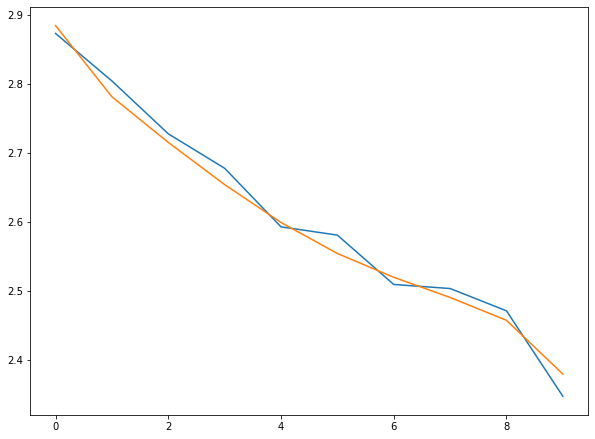

In [71]:
## Now plotting the graphs
Decile_analysis_train['ln_total_spend'].plot()
Decile_analysis_train['y_predict'].plot()

<AxesSubplot:>

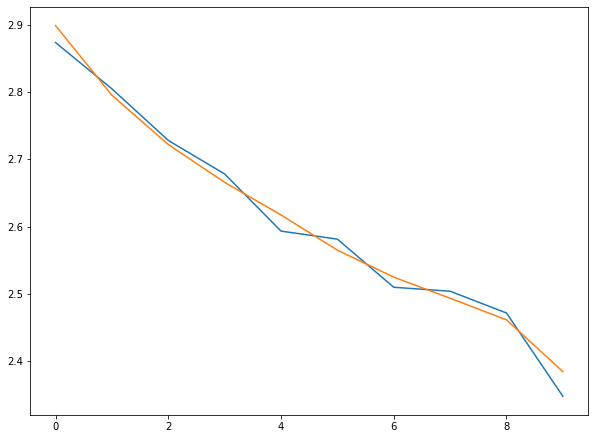

In [72]:
Decile_analysis_test['ln_total_spend'].plot()
Decile_analysis_test['y_predict_test'].plot()

In [73]:
#The predicted sales deciles in the training and testing dataset are in order.
# Hence, we can say that our model is good.

In [74]:
lm4.resid ## The difference between the observed value of the dependent variable (y) 
                               ## and the predicted value (ŷ) is called the residual.

2573   -0.532289
2066   -0.175600
2823    0.141612
2389    0.153505
2702    0.405551
          ...   
1180    0.083015
3441    0.197864
1344    0.103386
4623   -0.081073
1289    0.357403
Length: 3500, dtype: float64

<AxesSubplot:ylabel='Density'>

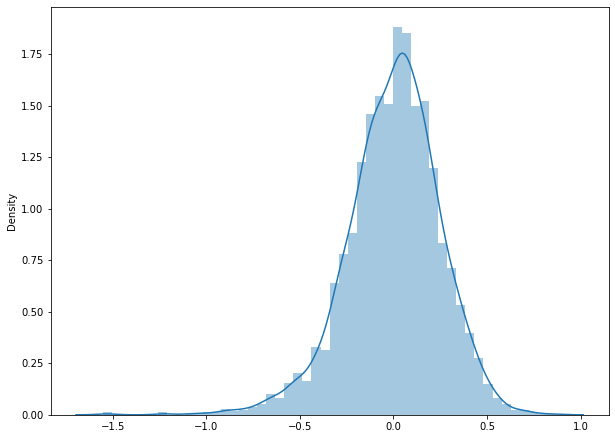

In [75]:
sn.distplot(lm4.resid) ## polotting residuals

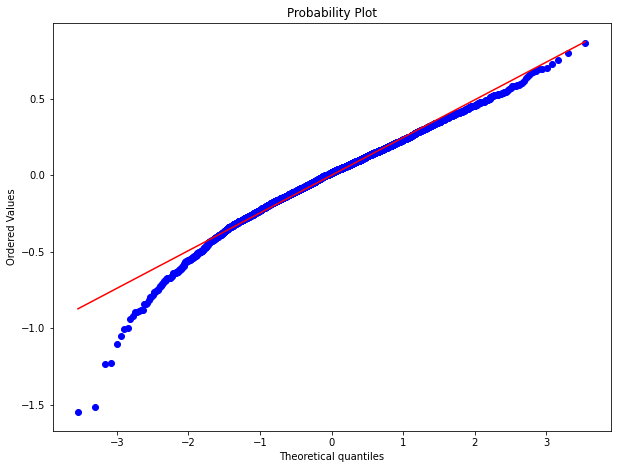

In [76]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(lm4.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line


In [77]:
# assumption: mean of residuals/errors is zero
print(lm4.resid.mean())

4.142083501587227e-16


## Drivers(positive and negative) for total spend

In [78]:
# top 15 drivers and their coefficient in linear regresssion equation
np.abs(lm4.params).sort_values(ascending=False)[1:16]

card_4       0.291052
card_3       0.262765
card_2       0.262111
card_5       0.230123
employ_45    0.218355
card2_4      0.195382
card2_2      0.190982
card2_3      0.179617
employ_32    0.167130
card2_5      0.146095
inccat_4     0.128807
reason_2     0.120963
employ_25    0.085574
ownvcr_1     0.076108
inccat_3     0.074735
dtype: float64

In [79]:
# top 10 positive drivers and their coefficient in linear regresssion equation
lm4.params.sort_values(ascending=False)[1:11]

employ_45         0.218355
employ_32         0.167130
inccat_4          0.128807
reason_2          0.120963
employ_25         0.085574
ownvcr_1          0.076108
inccat_3          0.074735
card2tenure_26    0.059483
owncd_1           0.055993
carown_1          0.048212
dtype: float64

In [80]:
# top 10 negative drivers and their coefficient in linear regresssion equation
lm4.params.sort_values(ascending=True)[0:10]

card_4     -0.291052
card_3     -0.262765
card_2     -0.262111
card_5     -0.230123
card2_4    -0.195382
card2_2    -0.190982
card2_3    -0.179617
card2_5    -0.146095
reason_4   -0.052146
gender_1   -0.025892
dtype: float64

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=True,max_depth=11,max_features=6,n_estimators=100).fit(train_X,train_y)

In [82]:
# top 15 drivers
feature_imp_df = pd.DataFrame({'features': train_X.columns,'feature_importance':rf.feature_importances_}).sort_values(by=['feature_importance'],ascending=False)
feature_imp_df.iloc[:15,:]

,features,feature_importance
9,card_2,0.060148
11,card_4,0.053552
13,carown_1,0.050847
10,card_3,0.050642
21,inccat_4,0.050408
28,reason_2,0.047145
24,owncd_1,0.046755
19,gender_1,0.046514
27,ownvcr_1,0.045612
26,ownipod_1,0.042609


<AxesSubplot:xlabel='feature_importance', ylabel='features'>

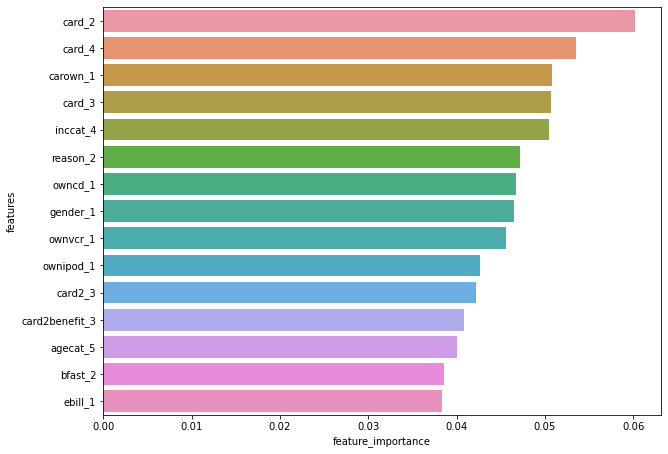

In [83]:
# top 15 drivers
sn.barplot(x=feature_imp_df.iloc[:15,:].feature_importance,y=feature_imp_df.iloc[:15,:].features)

## Now, predicting limit for new applicants

In [84]:
np.exp(lm4.predict(train))

2573    13.569651
2066    16.133614
2823    12.617465
2389    12.815369
2702    14.113657
          ...    
1180    15.331326
3441    19.161297
1344    12.529152
4623    14.127164
1289    11.628996
Length: 3500, dtype: float64

## From Linear Regresssion , the important factors driving the total spend are:

### [ 'card_2', 'card_4', 'carown_1', 'card_3',  'inccat_4',


### 'reason_2', 'owncd_1', 'gender_1', 'ownvcr_1', 'ownipod_1',


### 'card2_3', 'card2benifit_3', 'agecat_5', 'bfast_2', 'ebill_1'] 